In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time

import pytz

from astropy.coordinates import SkyCoord
from astroplan import Observer, FixedTarget

from astroplan import time_grid_from_range

from astroplan.plots import plot_airmass

In [2]:
from astroplan import download_IERS_A
download_IERS_A()

In [44]:
apo = Observer(latitude = 32.780278 * u.deg,
                      longitude = -105.820278 * u.deg ,
                      elevation = 2788 * u.m,
                      timezone = "US/Mountain",
                      name = "Apache Point Observatory"
                      )

m31 = FixedTarget.from_name("m31")
# M31 has an RA of 10.68 deg, or 0.71 hr, so best observation when Sun's RA is 0.71+12=12.71 hr
# This occurs in Autumn

In [45]:
reference_time = Time("2019-04-16 00:00:00")

astro_set = apo.twilight_evening_astronomical(reference_time, which='next')
astro_rise = apo.twilight_morning_astronomical(reference_time, which='next')

(astro_rise - astro_set).to(u.h)

<Quantity 8.10980503 h>

In [47]:
dec31 = Time("2019-12-31 12:00:00")

astro_set2 = apo.twilight_evening_astronomical(dec31, which='next')
astro_rise2 = apo.twilight_morning_astronomical(dec31, which='next')

moonrise = apo.moon_rise_time(dec31, which='next')
moonset = apo.moon_set_time(dec31, which='next')



print(astro_rise2.to_datetime())
print(astro_set2.to_datetime())

print(moonrise.to_datetime())
print(moonset.to_datetime())

2019-12-31 12:37:26.576831
2020-01-01 01:35:11.893983
2019-12-31 18:02:29.640709
2020-01-01 05:20:44.109540


In [54]:
apo.moon_phase(time=dec31)

<Quantity 2.0784992 rad>

In [48]:
m31rise = apo.target_rise_time(dec31, m31, which="next").iso
m31set = apo.target_set_time(dec31, m31, which="next").iso

print(m31rise)
print(m31set)

2019-12-31 16:49:33.170
2020-01-01 09:23:22.493


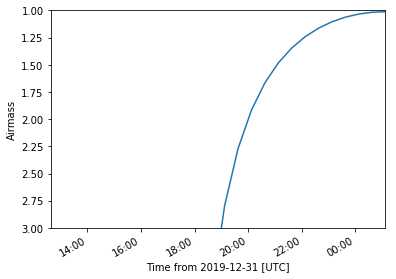

In [52]:
observing_range = [astro_rise2, astro_set2]

time_grid = time_grid_from_range(observing_range)

plot_airmass(m31, apo, time_grid);